# Exploratory Data Analysis:- Retail Sales Dataset

### Project Overview
In this project, I worked on a retail sales dataset with the aim of uncovering useful insights through Exploratory Data Analysis (EDA). The focus was on identifying key patterns and trends that could help the business understand its performance better. The insights gained from this analysis can support smarter decision-making and drive improvements in business strategy.

# Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for not throwing any kind of warning
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset & Explore Dataset

In [2]:
# load the dataset
df = pd.read_csv(r'retail_sales_dataset.csv')

In [3]:
# check columns name
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [4]:
# check dataset shape
df.shape

(1000, 9)

In [5]:
print("No. of Rows", df.shape[0])
print("No. of Columns", df.shape[1])

No. of Rows 1000
No. of Columns 9


In [6]:
# check first 5 rows of the dataset
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [7]:
# check last 5 rows of the dataset
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150
999,1000,4/12/2023,CUST1000,Male,47,Electronics,4,30,120


In [8]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
# statistical view of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [10]:
# check unique values of each column
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

# Descriptive Statistics

In [11]:
print('Age - Mean', df['Age'].mean())
print('Age - Median', df['Age'].median())
print('Age - Mode', df['Age'].mode().values)
print('Age - Std Dev', df['Age'].std())

Age - Mean 41.392
Age - Median 42.0
Age - Mode [43 64]
Age - Std Dev 13.681429659122527


In [12]:
print('Quantity - Mean', df['Quantity'].mean())
print('Quantity - Median', df['Quantity'].median())
print('Quantity - Mode', df['Quantity'].mode().values)
print('Quantity - Std Dev', df['Quantity'].std())

Quantity - Mean 2.514
Quantity - Median 3.0
Quantity - Mode [4]
Quantity - Std Dev 1.1327343409145356


In [13]:
print('Price per Unit - Mean', df['Price per Unit'].mean())
print('Price per Unit - Median', df['Price per Unit'].median())
print('Price per Unit - Mode', df['Price per Unit'].mode().values)
print('Price per Unit - Std Dev', df['Price per Unit'].std())

Price per Unit - Mean 179.89
Price per Unit - Median 50.0
Price per Unit - Mode [50]
Price per Unit - Std Dev 189.68135627129232


In [14]:
print('Total Amount - Mean', df['Total Amount'].mean())
print('Total Amount - Median', df['Total Amount'].median())
print('Total Amount - Mode', df['Total Amount'].mode().values)
print('Total Amount - Std Dev', df['Total Amount'].std())

Total Amount - Mean 456.0
Total Amount - Median 135.0
Total Amount - Mode [50]
Total Amount - Std Dev 559.997631555123


# Data Cleaning & Preprocessing

In [15]:
# chech null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [17]:
# Check if there is any garbage values
for i in df.select_dtypes(include = 'object').columns:
    print(df[i].value_counts())
    print("***"*5)

Date
5/16/2023    11
7/14/2023    10
5/23/2023     9
2/5/2023      8
8/5/2023      8
             ..
3/2/2023      1
8/2/2023      1
4/17/2023     1
3/30/2023     1
5/28/2023     1
Name: count, Length: 345, dtype: int64
***************
Customer ID
CUST1000    1
CUST001     1
CUST002     1
CUST003     1
CUST004     1
           ..
CUST013     1
CUST012     1
CUST011     1
CUST010     1
CUST009     1
Name: count, Length: 1000, dtype: int64
***************
Gender
Female    510
Male      490
Name: count, dtype: int64
***************
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
***************


In [18]:
# Standardization Columns
df.columns = df.columns.str.strip().str.replace(' ','_')

In [19]:
# check updated columns name
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age',
       'Product_Category', 'Quantity', 'Price_per_Unit', 'Total_Amount'],
      dtype='object')

In [20]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date']) 

In [21]:
df.dtypes

Transaction_ID               int64
Date                datetime64[ns]
Customer_ID                 object
Gender                      object
Age                          int64
Product_Category            object
Quantity                     int64
Price_per_Unit               int64
Total_Amount                 int64
dtype: object

#### Overall Dataset Overview: (After Cleaning & Preprocessing)

This dataset contains 1,000 entries and 9 variables, covering transaction-level retail data. Here's the breakdown:
- Numerical Variables: 5
- Categorical Variables: 3
- Date Variables: 1
- No Null Values
- No Duplicates
- Clean Data
- Special Values: No garbage values were detected.
- Column Name Standardization: Renamed columns for consistency
- Data Type Adjustments: Converted date columns to datetime format
- All entries are unique based on Transaction ID and Customer ID
- The dataset is clean, well-structured, and ideal for analyzing customer behavior, seasonal trends, and sales performance.

# Ouliers Detection

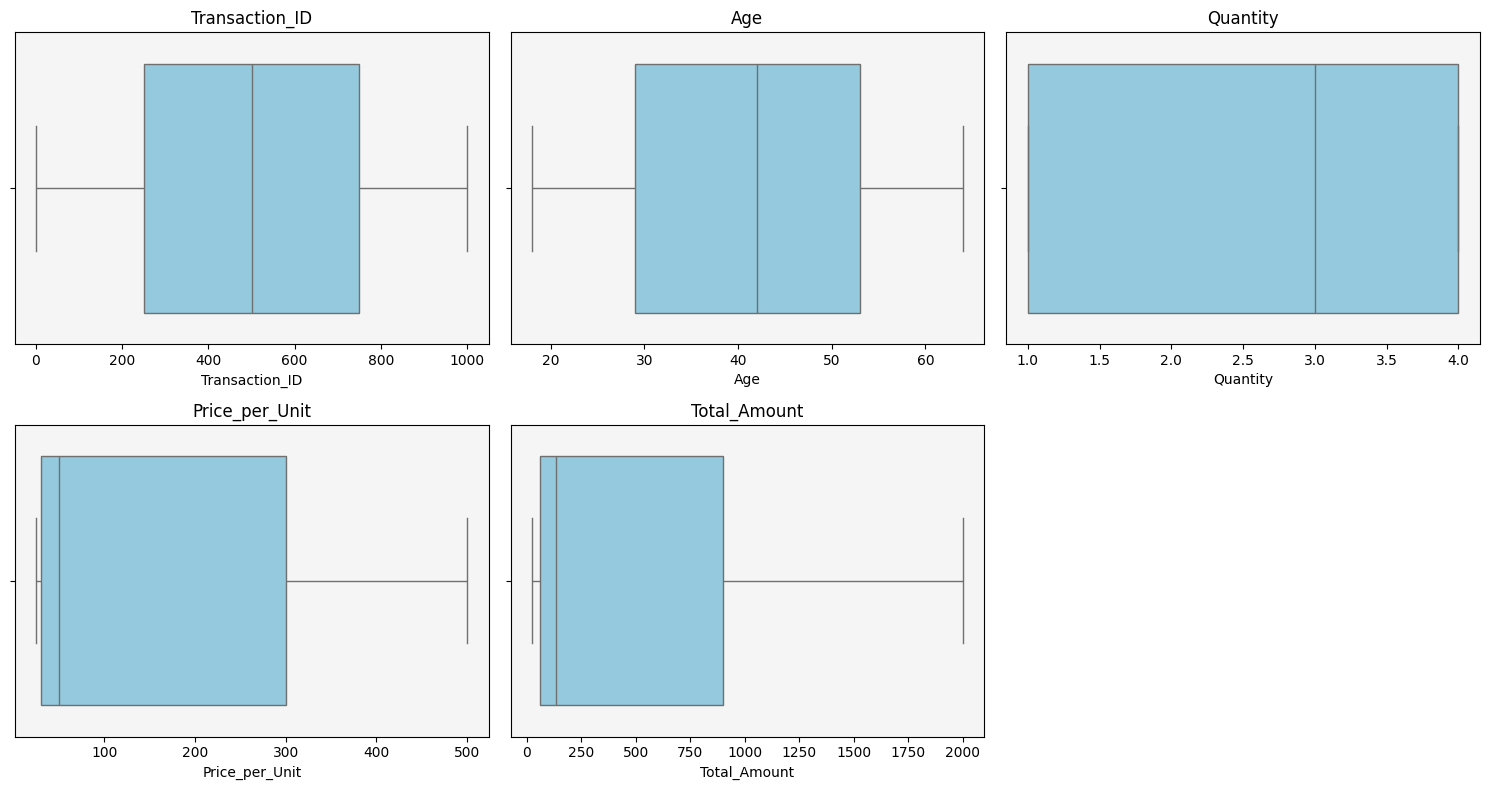

In [22]:
# Get all numerical columns
num_cols = df.select_dtypes(include="number").columns.tolist()

# Plot settings
cols = 3  # number of plots per row
rows = (len(num_cols) + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(col)
    plt.gca().set_facecolor('whitesmoke')  # light background

plt.tight_layout()
plt.show()

### Outlier Report
- As we can see through the Boxplot above, there is no Outliers

# Time Series Analysis

### Daily Sales Trend

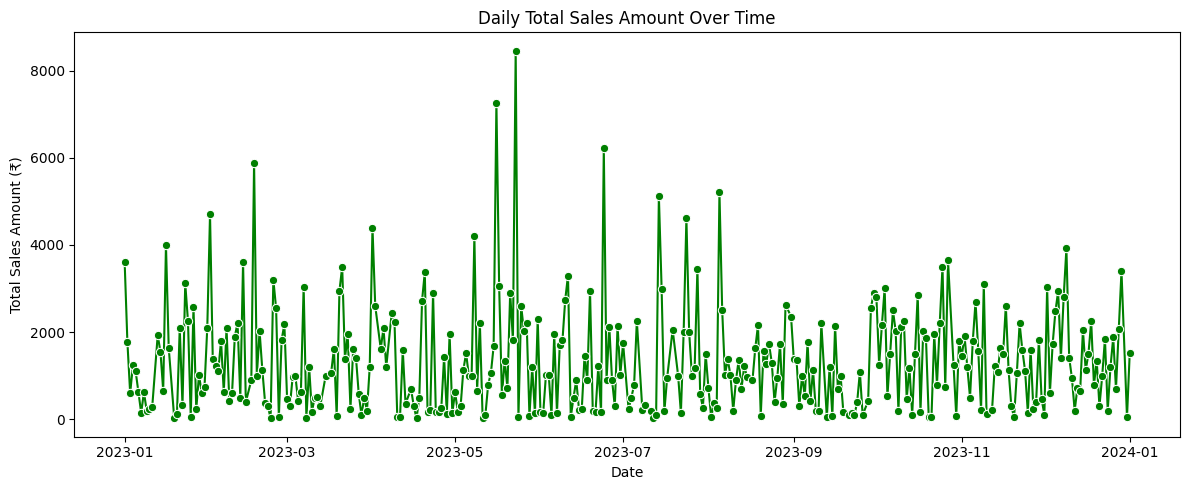

In [23]:
# group by date for daily sales trend
daily_sales_trend = df.groupby('Date')['Total_Amount'].sum().reset_index()

# plot the daily sales trend as a line chart
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales_trend, x='Date', y='Total_Amount', marker='o', color='green')
plt.title('Daily Total Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (₹)')
plt.tight_layout()
plt.show()

In [24]:
print(daily_sales_trend)

          Date  Total_Amount
0   2023-01-01          3600
1   2023-01-02          1765
2   2023-01-03           600
3   2023-01-04          1240
4   2023-01-05          1100
..         ...           ...
340 2023-12-27           700
341 2023-12-28          2075
342 2023-12-29          3400
343 2023-12-31            50
344 2024-01-01          1530

[345 rows x 2 columns]


### Weekly Sales Trend

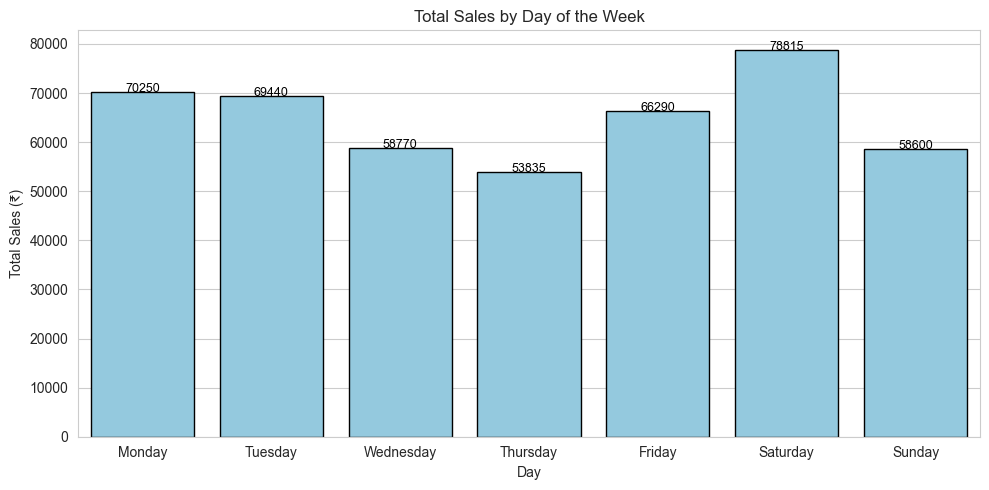

In [25]:
# Extract weekday names from the date
df['Day_of_Week'] = df['Date'].dt.day_name()

# Weekly Sales Trend: group by weekday
weekly_sales_trend = df.groupby('Day_of_Week')['Total_Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Set seaborn style
sns.set_style("whitegrid")

# Plot bar chart without hue to avoid warning
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=weekly_sales_trend, x='Day_of_Week', y='Total_Amount',
                      color='skyblue', edgecolor='black')

# Add value labels above bars
for index, row in weekly_sales_trend.iterrows():
    barplot.text(index, row['Total_Amount'] + 10, f"{int(row['Total_Amount'])}",
                 color='black', ha="center", fontsize=9)

# Plot styling
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales (₹)")
plt.tight_layout()
plt.show()

In [26]:
print(weekly_sales_trend)

  Day_of_Week  Total_Amount
0      Monday         70250
1     Tuesday         69440
2   Wednesday         58770
3    Thursday         53835
4      Friday         66290
5    Saturday         78815
6      Sunday         58600


### Monthly Sales Trend

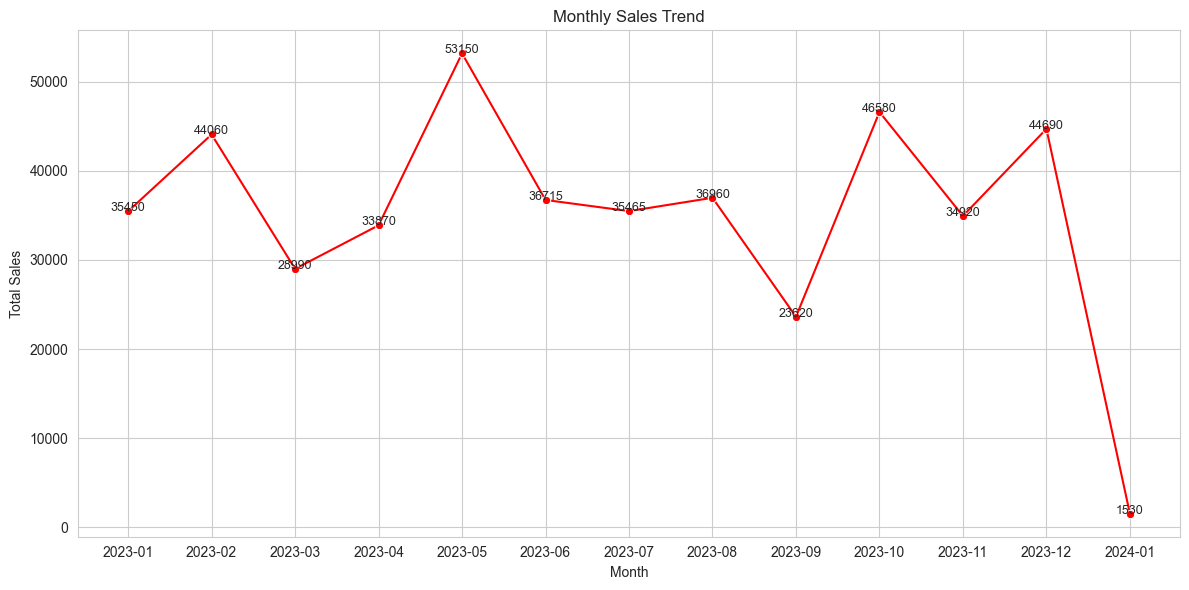

In [27]:
# Extract Months Name
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Monthly Sales Trend
monthly_sales_trend = df.groupby('Month')['Total_Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_trend, x='Month', y='Total_Amount', marker='o', color='red')

# Add Values above the points
for i in range(len(monthly_sales_trend)):
    plt.text(i, monthly_sales_trend['Total_Amount'][i] + 10,  # +10 to move label above the point
             str(round(monthly_sales_trend['Total_Amount'][i])), 
             ha='center', fontsize=9)
    
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [28]:
print(monthly_sales_trend)

      Month  Total_Amount
0   2023-01         35450
1   2023-02         44060
2   2023-03         28990
3   2023-04         33870
4   2023-05         53150
5   2023-06         36715
6   2023-07         35465
7   2023-08         36960
8   2023-09         23620
9   2023-10         46580
10  2023-11         34920
11  2023-12         44690
12  2024-01          1530


# Exploratory Data Analysis

### Gender Distribution by Transaction

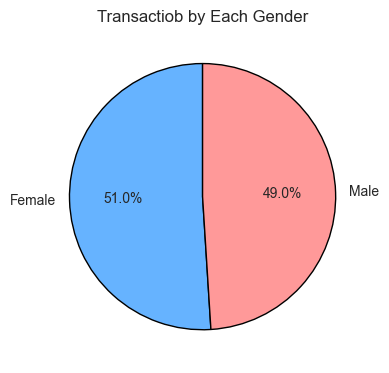

In [29]:
# calculate unique transactions by gender
gender_txn_counts = df.groupby('Gender')['Transaction_ID'].nunique()

# plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_txn_counts, 
        labels=gender_txn_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff','#ff9999','#99ff99'], 
        wedgeprops={'edgecolor': 'black'})

plt.title('Transactiob by Each Gender')
plt.tight_layout()
plt.show()

In [30]:
gender_txn_counts

Gender
Female    510
Male      490
Name: Transaction_ID, dtype: int64

### Gender Distribution by Product Category

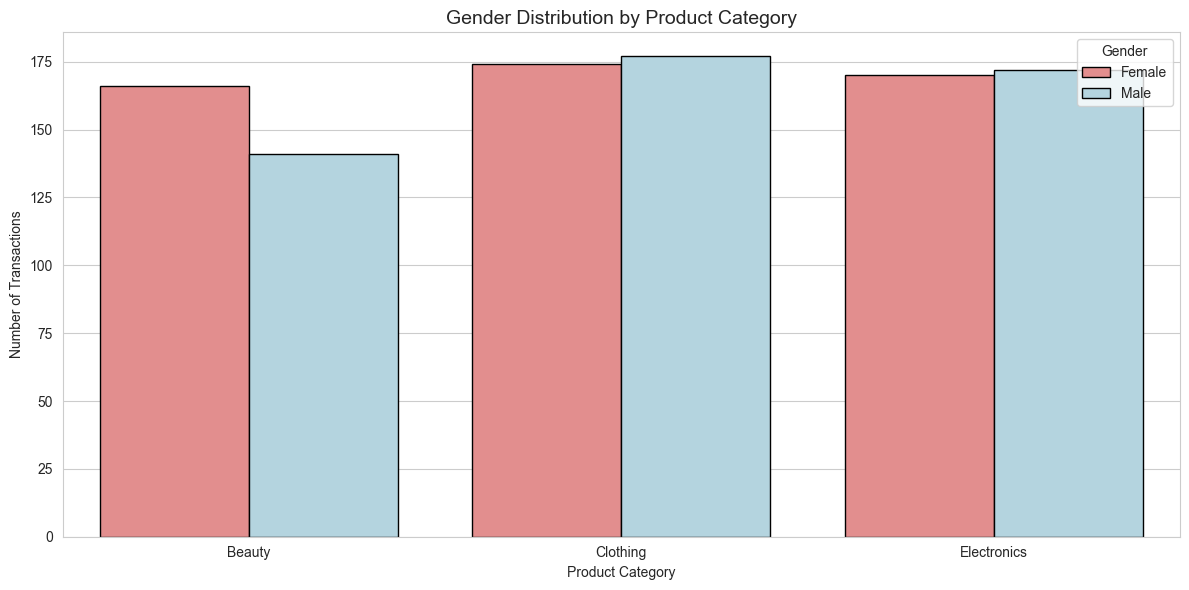

In [31]:
# Group by Product_Category and Gender, then count transactions
gender_counts = df.groupby(['Product_Category', 'Gender'])['Transaction_ID'].count().reset_index()

# Rename column for clarity
gender_counts.rename(columns={'Transaction_ID': 'Transaction_Count'}, inplace=True)

# Set plot style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=gender_counts, x='Product_Category', y='Transaction_Count', hue='Gender', palette=['lightcoral', 'lightblue'], edgecolor='black')

plt.title("Gender Distribution by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

In [32]:
gender_counts

,Product_Category,Gender,Transaction_Count
0,Beauty,Female,166
1,Beauty,Male,141
2,Clothing,Female,174
3,Clothing,Male,177
4,Electronics,Female,170
5,Electronics,Male,172


### Age Group-wise Transaction Count

In [33]:
# creating new column "Age_Group"

# define bins and labels
bins = [17, 30, 45, 60, 64]
labels = ['18-30', '31-45', '46-60', '61-64']

# Create age_group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [34]:
# check updated dataframe
df.head(0)

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Day_of_Week,Month,Age_Group


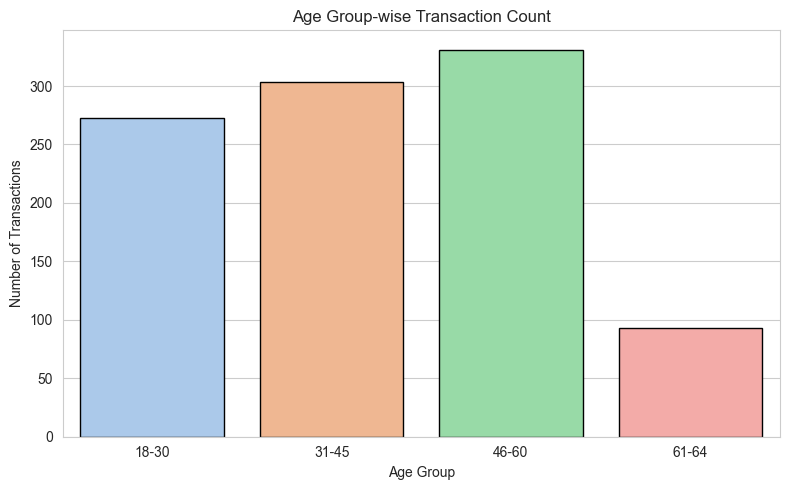

In [35]:
# Count number of transactions by Age Group
age_transaction_counts = df.groupby('Age_Group')['Transaction_ID'].count().sort_index().reset_index()
age_transaction_counts.columns = ['Age_Group', 'Transaction_Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=age_transaction_counts, x='Age_Group', y='Transaction_Count', hue='Age_Group', palette='pastel', legend=False, edgecolor='black')
plt.title('Age Group-wise Transaction Count')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [36]:
age_transaction_counts

,Age_Group,Transaction_Count
0,18-30,273
1,31-45,303
2,46-60,331
3,61-64,93


### Total Sales by Each Age Group

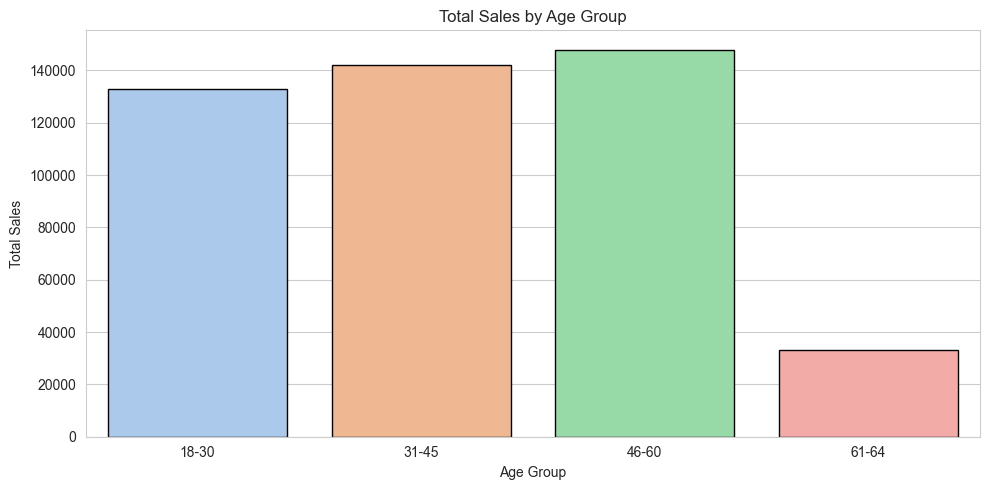

In [37]:
# Total sales by age group
total_amount_age = df.groupby('Age_Group')['Total_Amount'].sum().sort_values(ascending=False).reset_index()
total_amount_age.columns = ['Age_Group', 'Total_Sales']

plt.figure(figsize=(10, 5))
sns.barplot(data=total_amount_age, x='Age_Group', y='Total_Sales', palette='pastel', edgecolor='black')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [38]:
total_amount_age

,Age_Group,Total_Sales
0,46-60,147875
1,31-45,141955
2,18-30,132945
3,61-64,33225


### Product Category Distribution

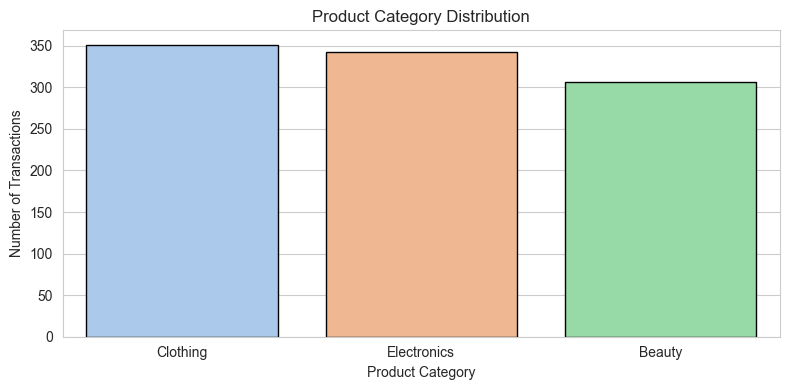

In [39]:
# Count of each product category
category_counts = df['Product_Category'].value_counts().reset_index()
category_counts.columns = ['Product_Category', 'Count']

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=category_counts, x='Product_Category', y='Count', palette='pastel', edgecolor='black')

plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [40]:
category_counts

,Product_Category,Count
0,Clothing,351
1,Electronics,342
2,Beauty,307


### Total Sales Generate by Gender

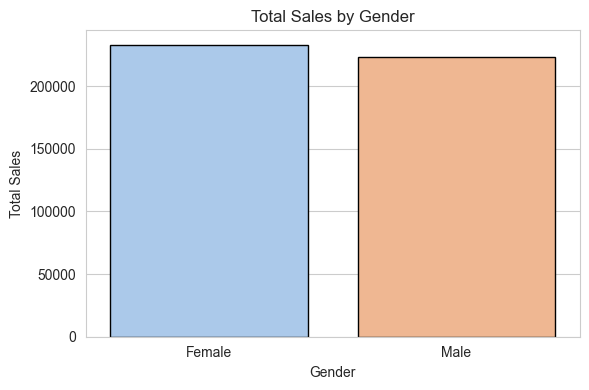

In [41]:
# Total sales by gender
total_sales_gender = df.groupby('Gender')['Total_Amount'].sum().reset_index()
total_sales_gender.columns = ['Gender', 'Total_Sales']

plt.figure(figsize=(6, 4))
sns.barplot(data=total_sales_gender, x='Gender', y='Total_Sales', palette='pastel', edgecolor='black')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [42]:
total_sales_gender

,Gender,Total_Sales
0,Female,232840
1,Male,223160


### Total Transactions by Day of Week

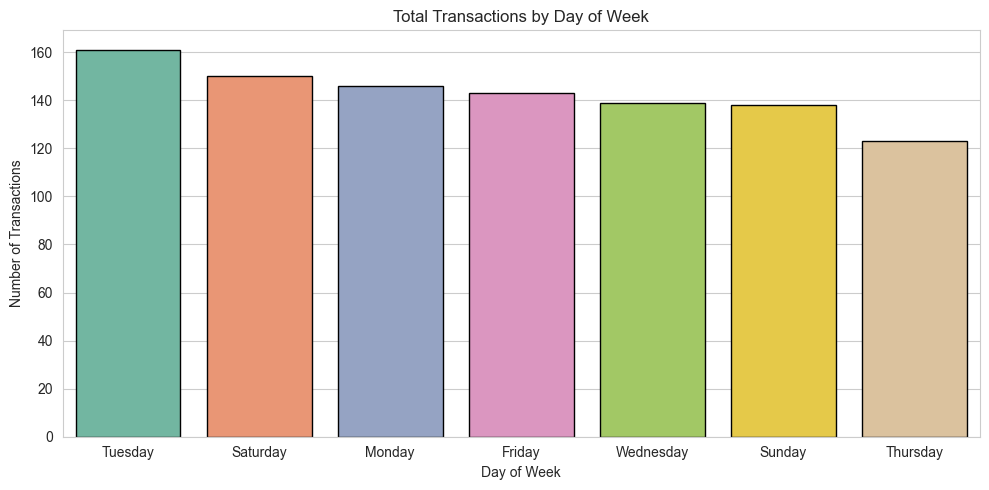

In [43]:
# Total transactions by Day of Week
weekday_transaction_counts = df.groupby('Day_of_Week')['Transaction_ID'].count().reset_index()
weekday_transaction_counts.columns = ['Day_of_Week', 'Transaction_Count']
weekday_transaction_counts = weekday_transaction_counts.sort_values(by='Transaction_Count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_transaction_counts, x='Day_of_Week', y='Transaction_Count', palette='Set2', edgecolor='black')
plt.title('Total Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

In [44]:
weekday_transaction_counts

,Day_of_Week,Transaction_Count
5,Tuesday,161
2,Saturday,150
1,Monday,146
0,Friday,143
6,Wednesday,139
3,Sunday,138
4,Thursday,123


### Total Transaction by Months

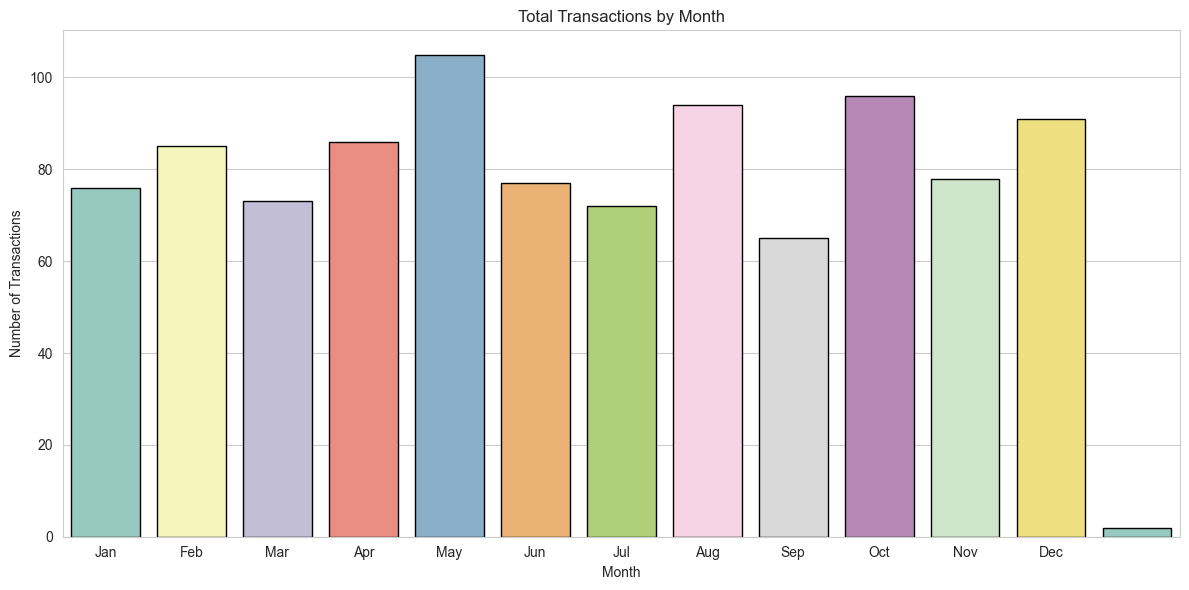

In [45]:
# Total transactions by Month (numeric)
month_transaction_counts = df.groupby('Month')['Transaction_ID'].count().reset_index()
month_transaction_counts.columns = ['Month', 'Transaction_Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=month_transaction_counts, x='Month', y='Transaction_Count', palette='Set3', edgecolor='black')
plt.title('Total Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [46]:
month_transaction_counts

,Month,Transaction_Count
0,2023-01,76
1,2023-02,85
2,2023-03,73
3,2023-04,86
4,2023-05,105
5,2023-06,77
6,2023-07,72
7,2023-08,94
8,2023-09,65
9,2023-10,96


# Recommendations

1. Use the strong sales months wisely (May, Aug, Oct & Dec):
These are the best months for sales, so the company should plan big promotions, festive campaigns, and product launches during this time to earn the maximum profit.

2. Fix the low sales month (September):
September shows very weak sales. The business should find out why (maybe stock or season issues) and run special offers or clearance sales to improve results.

3. Take advantage of weekends (especially Tuesday & Saturday):
Tuesday & Saturdays bring in the most money. Running weekend-only flash sales or discounts can make sales even stronger.

4. Improve Thursday sales:
Thursday is the weakest day. The company can try mid-week deals, buy-one-get-one offers, or online-only discounts to boost sales.

5. Focus more on women shoppers:
Women spend a little more than men, especially on Beauty and Clothing. The company can create special discounts, loyalty rewards, and social media ads to attract them.

6. Target middle-aged customers (31–60):
Most of the buyers are in this age group. Marketing messages should highlight things like quality, family value, and reliability because that’s what they usually look for.

7. Bring in more young customers (<30):
Younger people buy less right now. The business can attract them with student discounts, trendy bundles, and influencer promotions.

8. Get people to buy more per order:
Most orders are small (just 1–2 items). To fix this, the company should use bundle offers, “Buy 2, Get 1 Free” deals, and cross-selling to increase the average order size.

9. Balance cheap and premium products:
Affordable products sell the most, but premium products bring in big revenue when sold. The company should promote both — cheap items for regular buyers and premium ones for high-value customers.

# Thank You.....